In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_kmeans(X, centroids, labels, iteration, k):
    plt.figure(figsize=(8, 6))
    colors = plt.cm.get_cmap('Accent', k)
    
    for i in range(k):
        cluster_points = X[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                    s=50, color=colors(i), label=f'Кластер {i}')
    
    plt.scatter(centroids[:, 0], centroids[:, 1], 
                s=200, color='black', marker='X', label='Центроиды')
    
    plt.title(f"Итерация {iteration}")
    plt.legend()
    plt.show()

In [3]:
def kmeans(X, k, max_iters=100, tolerance=1e-4, picture=False):
    
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]
    
    for iteration in range(max_iters):
        
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        if np.linalg.norm(new_centroids - centroids) < tolerance:
            if picture:
                plot_kmeans(X, centroids, labels, iteration, k)
            break
        
        centroids = new_centroids
    return labels, centroids

In [4]:
def elbow_method(X, max_k=10, max_iters=100, tolerance=1e-4):

    inertias = []
    for k in range(1, max_k + 1):
        labels, centroids = kmeans(X, k, max_iters, tolerance)
        inertia = np.sum([np.sum((X[labels == i] - centroids[i]) ** 2) for i in range(len(centroids))])
        inertias.append(inertia)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), inertias, marker='o', linestyle='--')
    plt.title("Метод локтя")
    plt.xlabel("Количество кластеров (k)")
    plt.ylabel("Инерция")
    plt.xticks(range(1, max_k + 1))
    plt.grid()
    plt.show()

In [5]:
np.random.seed(42)
X = np.vstack([
    np.random.normal(loc=0.0, scale=1.0, size=(150, 5)),
    np.random.normal(loc=2.0, scale=5.0, size=(150, 5)),
    np.random.normal(loc=10.0, scale=2.0, size=(550, 5))
])

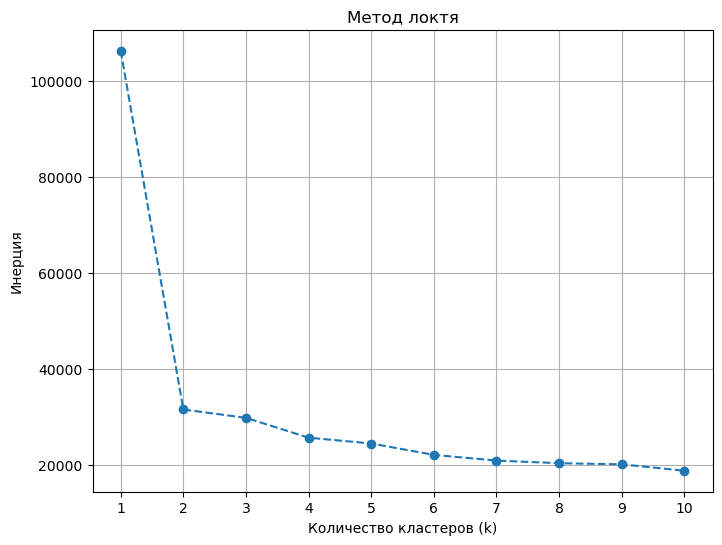

In [6]:
elbow_method(X, max_k=10)

/var/folders/71/7mkwvlfd149_1_b5jw_pdsb00000gn/T/ipykernel_44583/1275160653.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Accent', k)


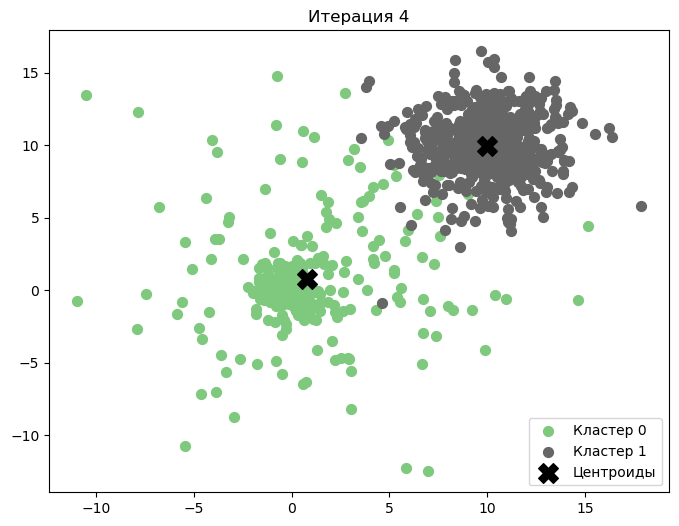

In [7]:
k = 2
labels, centroids = kmeans(X, k, picture=True)